In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

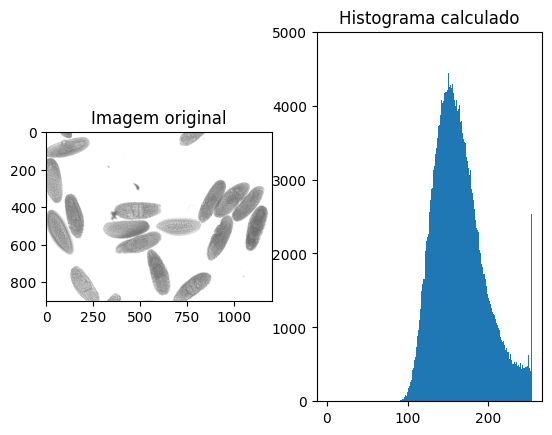

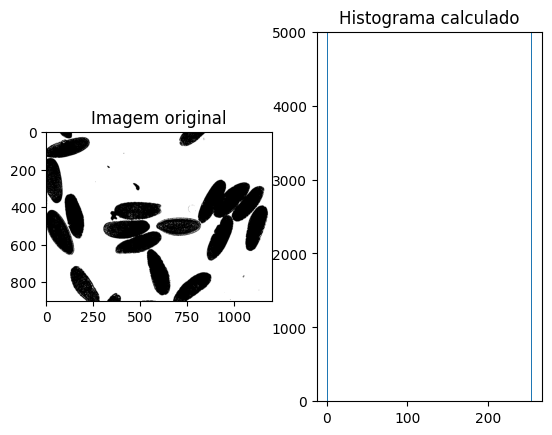

In [30]:
# Exercicio 1
# Faça a plotagem do histograma da imagem, observando o histograma, 
# escolha um valor para definir um threshold

img = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)
linhas = img.shape[0]
colunas = img.shape[1]

plt.subplot(1,2,1)
plt.title('Imagem original')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

#Calculo do histograma
lim = []
for i in range(0, 255):
    lim.append(i)

histArray = img.flatten()
plt.subplot(1,2,2)
histogram = plt.hist(histArray, lim)
plt.ylim(0,5000)
plt.title('Histograma calculado')
plt.show(histogram)

#--------------------------------------------------------------------------
#--------------------------------------------------------------------------
#Escolhendo um valor de threshold baseado na análise do histograma

for i in range(0, linhas):
    for j in range(0, colunas):
        if img[i][j] > 227:
            img[i][j] = 255
        else:
            img[i][j] = 0

plt.subplot(1,2,1)
plt.title('Imagem original')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

#Calculo do histograma
lim = []
for i in range(0, 256):
    lim.append(i)

histArray = img.flatten()
plt.subplot(1,2,2)
histogram = plt.hist(histArray, lim)
plt.ylim(0,5000)
plt.title('Histograma calculado')
plt.show(histogram)




In [3]:
def histogram(imagem):

    lim = []
    for i in range(0, 255):
        lim.append(i)

    histArray = imagem.flatten()
    return plt.hist(histArray, lim)

In [4]:
def probabilityArray(imagem):
    
    probabilityArray = np.zeros(256)
    imgFlat = imagem.flatten()

    for x in range(0, imgFlat.size):    
        probabilityArray[imgFlat[x]] += 1
    for x in range(0, probabilityArray.size):    
        probabilityArray[x] = probabilityArray[x] / (linhas * colunas) 
        
    return probabilityArray

In [16]:
def mediaReg(imagem, lim1, lim2):
    pArray = probabilityArray(imagem)
    media = 0

    # Calculo de P1
    p1 = 0
    for i in range(lim1, lim2):
        p1 = p1 + pArray[i]

    for i in range(lim1, lim2):
        media = media + (i * pArray[i])
    
    if p1 != 0:
        media = media / p1
        return media
    else:
        return 0


    

In [17]:
def adapThresh(imagem, variation):
    diff = 1000
    FT = math.floor(mediaReg(imagem, 0, 256)) #First thresh
    while diff > variation:
        ST = math.floor(mediaReg(imagem, 0, FT)) #Second thresh
        TT = math.floor(mediaReg(imagem, FT+1, 256)) #Third thresh
        CT = (ST+TT)/2
    
        diff = abs(FT - CT)
        FT = round(CT)
     
    return FT

Threshold adaptativo:  204


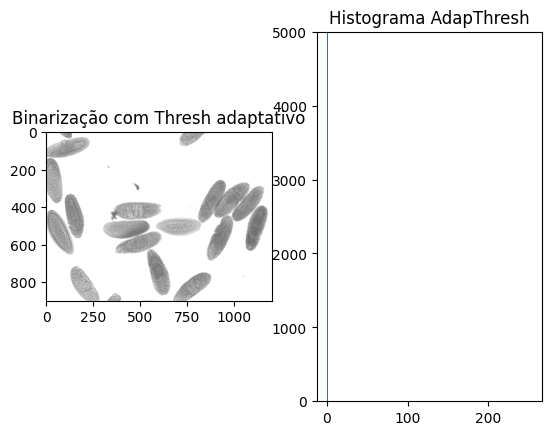

In [18]:
# Exercicio 2
# Segmentação utilizando a técnica de Threshold Adaptativo (implementar o algortimo). 
# Faça a aplicação do Threshold com e sem suavização prévia

img = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)
linhas = img.shape[0]
colunas = img.shape[1]

#print('FT',mediaReg(img, 0, 256))
#print('ST',mediaReg(img, 0, 228))
#print('TT',mediaReg(img, 229, 256))

adap = adapThresh(img, 2)
print('Threshold adaptativo: ', adap)


plt.subplot(1,2,1)
plt.title('Binarização com Thresh adaptativo')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)


for i in range(0, linhas):
    for j in range(0, colunas):
        if img[i][j] > adap:
            img[i][j] = 255
        else:
            img[i][j] = 0

plt.subplot(1,2,2)
hist = histogram(img)
plt.ylim(0,5000)
plt.title('Histograma AdapThresh')
plt.show(hist)



In [27]:
def varGlobal(img, lim):
    
    pArray = probabilityArray(img)
    mg = mediaReg(img, 0, 255)

    varG = 0
    for i in range(0, lim):
        varG = varG + pArray[i]*math.pow((i - mg), 2)

    return varG


286.2192182027694


In [19]:
#𝜎𝐵^2 = 𝑃1𝑃2(𝑚1−𝑚2)^2
def varClass(img, k):
    
    pArray = probabilityArray(img)
    m1 = mediaReg(img, 0, k)
    m2 = mediaReg(img, k+1, 255)

    P1 = 0
    for i in range(0, k):
        P1 = P1 + pArray[i]

    P2 = 0
    for i in range(k+1, 255):
        P2 = P2 + pArray[i]

    varC = P1*P2*math.pow((m1 - m2),2)

    return varC


In [33]:
def otsu(img):
    # High Variation
    hVar = 0
    bin = 0
    for i in range(0,255):
        nk = varClass(img, i) / varGlobal(img, 255)
        if nk > hVar:
            hVar = nk
            bin = i
    #print(i, nk)
    return bin

254 0.0
Maior variância: 0.1851663726560204
Segmentação no bin:  172


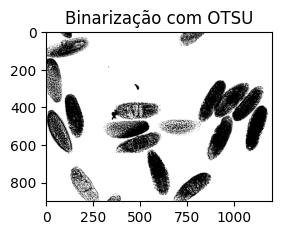

In [35]:
# Exercicio 3
# Segmentação utilizando a técnica de Otsu (implementar). Faça a aplicação do Threshold com e sem suavização prévia. 
# Mostre um gráfico com o histograma juntamente com a variância entre classes 

# maximizar a variância entre as classes (grupos)
# minimizar a variância interna das classes (grupos)

img = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)
lin = img.shape[0]
col = img.shape[1]
#plt.subplot(1,2,1)
#plt.imshow(img, cmap='gray', vmin=0, vmax=255)
#print('linhas: ', lin)
#print('colunas: ', col)

bin = otsu(img)

for i in range(0, linhas):
    for j in range(0, colunas):
        if img[i][j] > bin:
            img[i][j] = 255
        else:
            img[i][j] = 0

print('Segmentação no bin: ', bin)
plt.subplot(1,2,1)
plt.title('Binarização com OTSU')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()



254 0.0
Segmentação no bin:  178


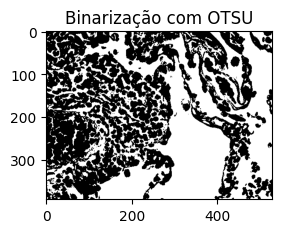

In [36]:
# Exercicio 4
# Aplique o Otsu para a imagem HE.jpg, madrill.tiff e Lenna.jpg 
# (use antes a conversão da imagem para tons de cinza)

img1 = cv2.imread("HE.jpg", cv2.IMREAD_GRAYSCALE)
lin = img1.shape[0]
col = img1.shape[1]

bin1 = otsu(img1)

for i in range(0, lin):
    for j in range(0, col):
        if img1[i][j] > bin1:
            img1[i][j] = 255
        else:
            img1[i][j] = 0

print('Segmentação no bin: ', bin1)
plt.subplot(1,2,1)
plt.title('Binarização com OTSU')
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.show()

254 0.0
Segmentação no bin:  128


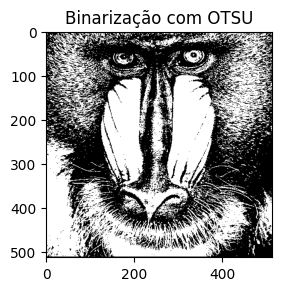

In [37]:
img2 = cv2.imread("madrill.tiff", cv2.IMREAD_GRAYSCALE)
lin = img2.shape[0]
col = img2.shape[1]

bin2 = otsu(img2)

for i in range(0, lin):
    for j in range(0, col):
        if img2[i][j] > bin2:
            img2[i][j] = 255
        else:
            img2[i][j] = 0

print('Segmentação no bin: ', bin2)
plt.subplot(1,2,1)
plt.title('Binarização com OTSU')
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.show()

254 0.0
Segmentação no bin:  178


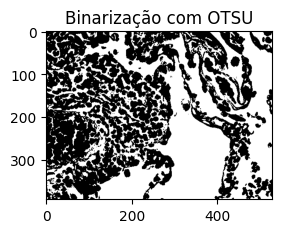

In [38]:
img3 = cv2.imread("HE.jpg", cv2.IMREAD_GRAYSCALE)
lin = img3.shape[0]
col = img3.shape[1]

bin3 = otsu(img3)

for i in range(0, lin):
    for j in range(0, col):
        if img3[i][j] > bin3:
            img3[i][j] = 255
        else:
            img3[i][j] = 0

print('Segmentação no bin: ', bin3)
plt.subplot(1,2,1)
plt.title('Binarização com OTSU')
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
plt.show()